<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
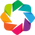

In [1]:
from scipy.stats import multivariate_normal, norm, bernoulli
import numpy as np
import pandas as pd
from codebase.smc2 import * 
from codebase.plot import * 
from scipy.special import logsumexp


%matplotlib inline

%load_ext autoreload
%autoreload 2

# Read Data

In [2]:
np.random.seed(121)
nsim_data = 150
J = 6
K = 2
beta = np.array([[1,0], [-2, 2],[-1,-1],[2,1], [3,-1], [1,-1]], dtype=float)
sigma = np.array([1,2,.3,.8, 1, 1.4])
Sigma = np.diag(sigma)
ee = multivariate_normal.rvs(mean = np.zeros(J), cov = Sigma, size=nsim_data)
zz = multivariate_normal.rvs(mean = np.zeros(K), cov=np.eye(K), size=nsim_data)
yy = zz@beta.T + ee

In [3]:
data = dict()
data['N'] = nsim_data
data['K'] = K
data['J'] = J
data['sigma'] = sigma
data['Sigma'] = Sigma
data['y'] = yy
data['z'] = zz
data['beta'] = beta
data['e'] = ee
data['Omega'] = beta @ beta.T + Sigma 

In [4]:
%opts Histogram [width=200, height=200, tools=['hover']] 

hv.Distribution(data['y'][:,0]).options(alpha=0.3)


:Distribution   [Value]   (Density)

In [5]:
print("dim(beta) = ", beta.shape)
print("dim(z) = ", zz.shape)
print("dim(y) = ", yy.shape)
print("dim(e) = ", ee.shape)


dim(beta) =  (6, 2)
dim(z) =  (150, 2)
dim(y) =  (150, 6)
dim(e) =  (150, 6)


In [6]:
nsim_prtcls = 100
particles = dict()
particles['beta'] = prior_beta(data['K'],data['J'], size=nsim_prtcls) # run with prior Cov = 100 * I
particles['sigma'] = prior_sigma(data['J'], size=nsim_prtcls)
particles['Sigma'] = construct_Sigma(particles['sigma'])
particles['parameter_names'] = ['beta',
                               'Sigma',
                               'sigma']
particles['N'] = nsim_prtcls
log_weights = np.zeros(nsim_prtcls)  ### log 1 = 0
loglkhds = np.empty(nsim_data)
print("ESS: %.2f"%(ESS(log_weights)))

ESS: 100.00


In [7]:
np.seterr(all='ignore')

i = 0
data_temp = data.copy()
data_temp["N"] = int(i+1)
data_temp['y'] = data['y'][i].copy()

log_incr_weights = get_weights(data_temp, particles)
loglkhds[i] = logsumexp(log_weights + log_incr_weights) - logsumexp(log_weights)

log_weights = log_incr_weights + log_weights

print("ESS: %.2f"%(ESS(log_weights)))

ESS: 27.79


In [8]:
i = 1

data_temp["N"] = int(i+1)
data_temp['y'] = data['y'][i].copy()

log_incr_weights = get_weights(data_temp, particles)
loglkhds[i] = logsumexp(log_weights + log_incr_weights) - logsumexp(log_weights)

log_weights = log_incr_weights + log_weights

print("ESS: %.2f"%(ESS(log_weights)))

ESS: 11.56


In [9]:
degeneracy_limit = .5
for i in range(2,nsim_data):
    data_temp["N"] = int(i+1)
    data_temp['y'] = data['y'][i].copy()


    log_incr_weights = get_weights(data_temp, particles)
    loglkhds[i] = logsumexp(log_weights + log_incr_weights) - logsumexp(log_weights)
    log_weights = log_incr_weights + log_weights
    print("ESS: %.2f"%(ESS(log_weights)))
    
    if (ESS(log_weights) < degeneracy_limit * nsim_prtcls) and (i+1) < nsim_data:
        data_temp['y'] = data['y'][:(i+1)].copy()
        data_temp['z'] = data['z'][:(i+1)].copy()
        print("Deg %d"%(i))
        particles = multinomial_sample_particles(particles, np.exp(log_weights))
    
        particles = jitter(data_temp, particles, 100)
        log_weights = np.zeros(nsim_prtcls)
    else:
        pass


ESS: 1.21
Deg 2
ESS: 19.08
Deg 3
ESS: 18.34
Deg 4
ESS: 1.41
Deg 5
ESS: 24.02
Deg 6
ESS: 45.06
Deg 7
ESS: 41.09
Deg 8
ESS: 9.72
Deg 9
ESS: 35.87
Deg 10
ESS: 14.45
Deg 11
ESS: 48.01
Deg 12
ESS: 49.46
Deg 13
ESS: 26.01
Deg 14
ESS: 65.76
ESS: 23.47
Deg 16
ESS: 61.50
ESS: 30.93
Deg 18
ESS: 61.11
ESS: 19.79
Deg 20
ESS: 66.55
ESS: 34.42
Deg 22
ESS: 60.68
ESS: 39.72
Deg 24
ESS: 62.91
ESS: 44.03
Deg 26
ESS: 71.43
ESS: 48.90
Deg 28
ESS: 70.90
ESS: 46.42
Deg 30
ESS: 52.46
ESS: 36.99
Deg 32
ESS: 47.93
Deg 33
ESS: 34.49
Deg 34
ESS: 75.80
ESS: 41.56
Deg 36
ESS: 86.42
ESS: 50.64
ESS: 19.57
Deg 39
ESS: 84.75
ESS: 75.47
ESS: 47.63
Deg 42
ESS: 66.58
ESS: 65.72
ESS: 60.86
ESS: 13.68
Deg 46
ESS: 90.10
ESS: 75.04
ESS: 53.21
ESS: 46.88
Deg 50
ESS: 63.48
ESS: 62.42
ESS: 53.89
ESS: 57.94
ESS: 50.84
ESS: 38.18
Deg 56
ESS: 84.46
ESS: 82.78
ESS: 79.10
ESS: 61.02
ESS: 57.47
ESS: 54.63
ESS: 50.86
ESS: 47.65
Deg 64
ESS: 72.32
ESS: 63.29
ESS: 47.02
Deg 67
ESS: 95.81
ESS: 80.90
ESS: 66.68
ESS: 46.74
Deg 71
ESS: 94.36

In [10]:
weights = np.exp(log_weights)

In [13]:
from codebase.file_utils import save_obj

save_obj(particles, 'particles' , './log/smc1/')
save_obj(log_weights, 'log_weights' , './log/smc1/')
save_obj(loglkhds, 'lkhds' , './log/smc1/')


In [14]:
%opts Histogram [width=600, height=200, xrotation=90, tools=['hover']] (fill_color='lightblue') 



In [15]:
%opts Distribution [width=500, height=200, tools=['hover']] 


In [16]:
%opts Curve [width=800, height=300, tools=['hover']] 



In [17]:
%opts Bars [width=1000, height=400, xrotation=90, tools=['hover']] 

df = pd.DataFrame(weights, columns=['ws']).reset_index()
weights_plot = hv.Bars(df, hv.Dimension('index'), 'ws')

weights_plot

:Bars   [index]   (ws)

# Posterior Distributions

In [18]:
def construct_params(ps):
    nsim = ps['sigma'].shape[0]
    J = ps['sigma'].shape[1]
    a = np.empty((nsim, J, J))
    for i in range(nsim):
        a[i] = ps['beta'][i]@ps['beta'][i].T + \
            np.diag(ps['sigma'][i])

    return a
        
    
Omega = construct_params(particles)
particles['Omega'] = Omega
# data['obs_cov'] = np.cov(data['y'].T)

In [19]:
estimate = dict()

estimate['sigma'] = np.average(particles['sigma'], axis=0, weights=weights)
estimate['beta'] = np.average(particles['beta'], axis=0, weights=weights)
estimate['Omega'] = np.average(particles['Omega'], axis=0, weights=weights)


In [20]:
%%opts Curve [width=600, height=200, tools=['hover']] 
plots = []
for i in range(J):
    for j in range(J):
            plots.append(plot_histograms(particles['Omega'][:,i,j],
                                         weights=weights, 
                                         true_value=data['Omega'][i,j],
                     title = 'Posterior distribution for Omega(%s,%s)'%(i,j)))
layout = hv.Layout(plots)
layout.cols(1)

:Layout
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_0_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_1_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_2_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_3_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_4_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_5_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_0_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_1_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_2_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_3_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_4_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_5_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_0_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_1_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_2_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_3_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_4_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_5_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_3_comma_0_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_3_comma_1_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.

In [21]:
%%opts Curve {+axiswise} [width=600, height=200, tools=['hover']] 
plots = []
for i in range(J):
    for j in range(K):
            plots.append(plot_histograms(particles['beta'][:,i,j],
                                         weights=weights, 
                                         true_value=data['beta'][i,j],
                     title = 'Posterior distribution for beta(%s,%s)'%(i,j)))
layout = hv.Layout(plots)
layout.cols(1)

:Layout
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_0_comma_0_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_0_comma_1_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_1_comma_0_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_1_comma_1_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_2_comma_0_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_2_comma_1_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_3_comma_0_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_3_comma_1_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_4_comma_0_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_4_comma_1_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_5_comma_0_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_5_comma_1_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)

In [22]:
%%opts Curve {+axiswise} [width=600, height=200, tools=['hover']] 

plots = []
for i in range(data['J']):
    plots.append(plot_histograms(particles['sigma'][:,i],
                                 weights = weights, 
                                 true_value=data['sigma'][i],
             title = 'Posterior distribution for sigma(%s)'%(i)))
layout = hv.Layout(plots)
layout.cols(1)

:Layout
   .Overlay.Posterior_distribution_for_sigma_left_parenthesis_0_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_sigma_left_parenthesis_1_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_sigma_left_parenthesis_2_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_sigma_left_parenthesis_3_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_sigma_left_parenthesis_4_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_sigma_left_parenthesis_5_right_parenthesis :Overlay
      .Histogram.Samples :Histogram   [x]   (Frequency)
      .Curve.True_Value  :Curve   [x]   (y)

In [25]:
estimate['marginal_loglklhd'] = np.nansum(loglkhds)
estimate['marginal_loglklhd']

-1696.970349999824

In [26]:
loglkhds

array([-12.60172404, -11.85673406, -22.76706394, -13.54190838,
       -13.58733416, -19.51937927, -14.53329582, -14.25098049,
       -13.94929239, -15.41110388, -14.19022573, -14.91825592,
       -11.8658222 , -12.38382007, -14.60442114, -11.67371763,
       -13.44499388, -12.57014768, -12.71562966, -12.0801294 ,
       -11.88227009, -12.8731209 , -10.9394641 , -11.91106436,
       -10.20257427, -11.83389963, -10.85765801, -10.82450492,
       -10.97340414, -10.89787799,  -9.80393039, -12.2176563 ,
       -10.05412172, -12.05635222, -13.75637079, -11.69223865,
       -12.63809481,  -9.20918314, -11.81739064, -15.00252873,
       -10.94972168,  -9.57179779, -12.17295971, -12.76793367,
        -9.92633053, -10.77388285, -15.29582001, -10.27237686,
       -10.17653881, -10.52184554,  -9.22788219, -11.33066089,
        -9.42652834,  -9.22244958, -12.4392297 ,  -8.8256046 ,
        -9.95721043, -10.26098569, -10.37919553, -11.07250296,
       -11.88781596,  -8.94858569, -10.15004678,  -9.02